# Content and Objectives

+ Show validity of Knuth's algorithm to generate Poission-distributed random variables
+ Algorithm: 
    + Berechne $e^{-\lambda}$
    + Setze $k=0$, $p=1$
	+ WHILE $p\leq e^{-\lambda}$ DO:
		+ $k\leftarrow k+1$
		+ Sample $U\sim\mathcal{U}(0,1)$
		+ $p\leftarrow p\cdot U$	
	+ RETURN $k-1$
	

# Import

In [1]:
# importing
import numpy as np

from scipy import stats, special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Apply algorithm as function returning a Poission-distributed value
    



In [3]:
def Knuth_Poisson( lamb ):
    '''
    return Poission-dstributed RV;
    lines directly following above algorithm

    IN: lambda
    OUT: N as Poission (Lamb )
    '''

    k = 0
    p = 1

    while p > np.exp( - lamb ):
        k += 1

        U = np.random.rand()
        p *= U

    return k- 1

In [4]:
# get Poisson values
lamb = 10
N_trials = int( 1e5 )

Poisson_values = np.array( [ Knuth_Poisson( lamb ) for _n in range( N_trials ) ] )

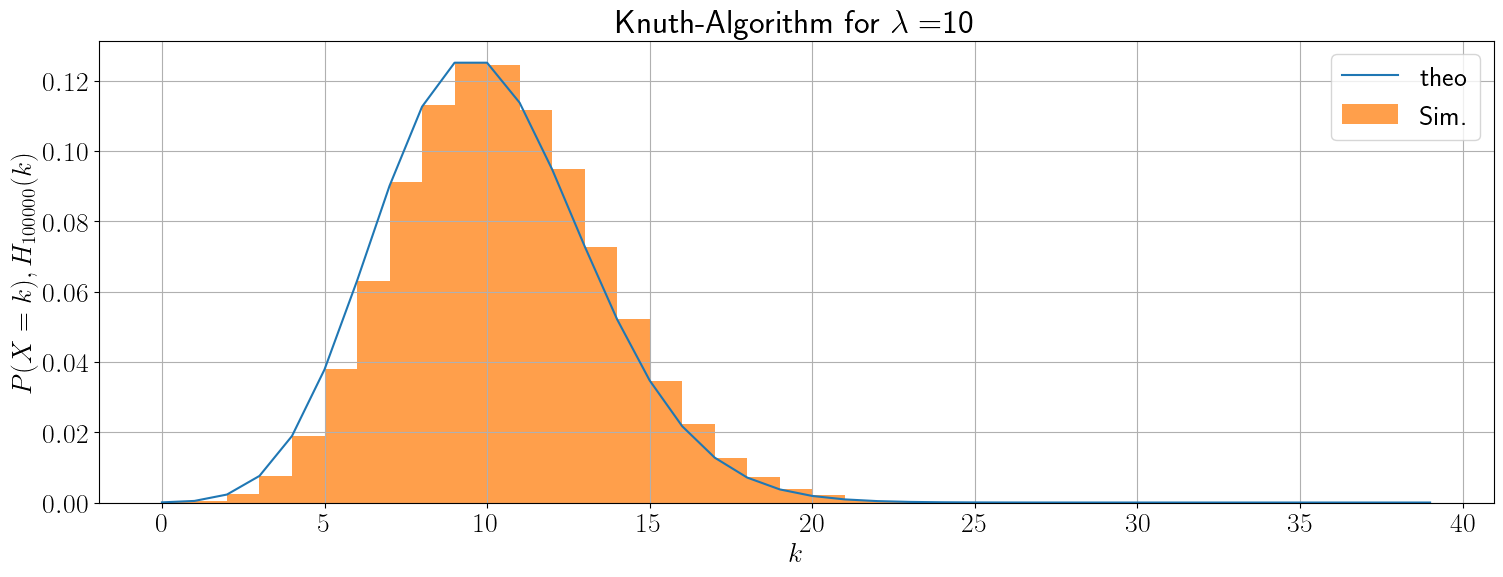

In [5]:
# plotting
n_theo = np.arange( 0, 4 * lamb )
plt.plot( n_theo, stats.poisson.pmf( n_theo, lamb ), label='theo')

plt.hist( Poisson_values, color='C1', bins=n_theo, density=1, label='Sim.', alpha=0.75)    

plt.xlabel('$k$')
plt.ylabel('$P(X=k), H_{{{}}}(k)$'.format(N_trials)) 
plt.grid( True )
plt.legend( loc = 'upper right' )
plt.title('Knuth-Algorithm for $\\lambda=${}'.format( lamb ))
plt.savefig('Knuth.png', dpi=300)
plt.show()
